<a href="https://colab.research.google.com/github/PixelatedLatte/MachineLearningProjects/blob/main/DiabetesScreeningLCMBlankenship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 460G: Machine Learning
## Spring 2026
## Assignment 1

___


**Double click on this cell and write your name/UK ID/email.**

Name: Jacob Blankenship

ID: 912676349

Email: jrbl245@uky.edu

# READ THIS FIRST

## Reminder on what's up for you in this assignment

This is one of the three assignments. A maximum of 100 points are available from this assignment. You will need to use your learning from the first 2 weeks' lectures.

You will turn in completed version of this notebook (both ipynb and pdf files). Your submission will be graded under 3 major criteria:

  * Functional code: Completed code with every piece functional
  * Correctness: Your submitted notebook contains correct code that gives accurate results unless otherwise stated
  * Documentation: Every cell is well-documented and easy-to-follow to reproduce the results

$~$

## Reproducibility in iPython Notebooks

As you have noticed, iPython notebooks are interactive Python sessions that allow us to spread our code, text, and markdown seamlessly.

Every word you read and write is modifiable. You can double click this cell to change the text you're reading now. You will use such cells to write your answers/code.

Don't forget to double click the first cell, and write your name, ID, and email.

Cells can be added for code or text. Check the top left corner: "+Code" to add a new cell for writing code and "+Text" to add a new cell for raw texts.

The best thing about notebooks is that you can quickly run small components of your code in separate cell to make sure they work before putting together for a larger component. Another good thing is, as you noticed during our in-class hands-on, the entire assignment self-contained in this ipynb file. So, you can put all your functions and classes into the cells of this notebook. Please make sure your code is written cleanly with documentation (how to use your work once completed, to reproduce the exact same results). Once you're done, download the notebook as ipynb file and submit on Canvas before the due date. Please also make sure to download the PDF file when everything works fine: File-->Print-->Save as PDF

Please be reminded, it is important to write readable and reproducible code. Let's take a small fine step towards that goal, with this notebook.

## **Linear Classification: Data Preparation, Linear Machine Learning Algorithm & Evaluation**

---

For this experiment, we use Diabetes Screening Dataset from Kaggle. The dataset can be accessed from https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset. There are in total 100,000 samples in the dataset. There are eight different features (age, gender, hypertension,  smoking history, heart_disease, bmi, HbA1c_level, blood_glucose_level) and the corresponding Diabetes label (positive/negative) for each of the samples. These features can be taken as inputs to train a machine learning algorithm to map them to target Diabetes status (0/1) outputs.

For simplicity, the non-numeric features (gender and smoking history) have been removed. The modified dataset can be accessed at [diabetes dataset](https://drive.google.com/file/d/1cfc8QVGXdf1EVhW_A_dROHGFmq8n2aTZ/). You should download and upload to your google drive.


You need to use the Linear Model (Logistic Regression) discussed in the W2L2 lecture. Then evaluate the model performance using some performance metrics. Please feel free to use any code provided in the *Linear-Classification.ipynb* Colab notebook.

### Dataset Preparation (30 points)

#### First we load the dataset and try to understand it   

#### To Do:

<ul>Load the Diabetes dataset from directory</ul>
<ul>Get the features and corresponding class labels</ul>
<ul>Verify the shape of the features and labels</ul>


Remember, you need to mount google drive for read/write access. Then you can read the CSV file from your drive using Pandas.

In [2]:
#To Do: Mount your google drive directory

# https://www.geeksforgeeks.org/data-science/how-to-load-a-dataset-from-the-google-drive-to-google-colab/
# ^ Side used for code on how to mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read the data

---


#### Understand it: check, analyze, visualize

In [4]:
import pandas as pd
#To Do: Use pd.read_csv to read the CSV file from given filepath
ScreeningDataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLDatasets/DiabetesScreening.csv')



In [5]:
#To Do: Check the keys
ScreeningDataset.keys()

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

Display the entire diabetes dataset and check the shape.

In [6]:
#To Do: First we extract the 'features' and 'target' from the dictionary
features = ScreeningDataset.drop('diabetes', axis = 1)
labels = ScreeningDataset['diabetes']

In [7]:
#To Do: check the shapes of features and labels
features.shape, labels.shape

((100000, 6), (100000,))

In [8]:
#To Do: Display features
features
labels

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [9]:
features['bmi'].quantile([0.25,0.5,0.75]), features['bmi'].max()
# Checking distributions since a bmi of 95 is insane

(0.25    23.63
 0.50    27.32
 0.75    29.58
 Name: bmi, dtype: float64,
 95.69)

Text(0, 0.5, 'Count')

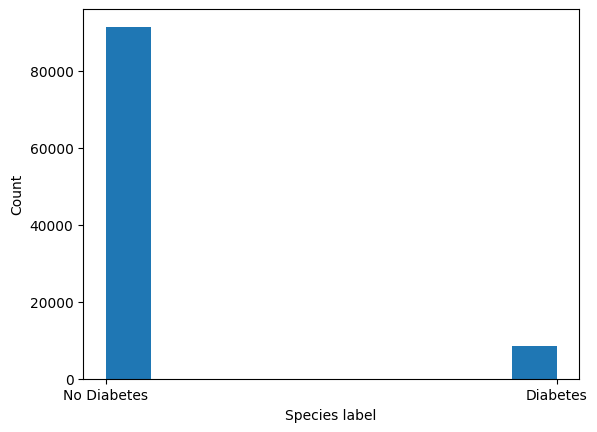

In [10]:
#To Do: Check the label distribution
plt.hist(labels)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Species label')
plt.ylabel('Count')

Distribution Findings: *It is clear that the majority of our 100k sample do not have diabetes, with a ~90-10 split between no diabetes compared to diabetes.*

Now, let's do some plots to better understand the dataset. We can create scatter plot of the dataset by taking any two features at a time (e.g., bmi and HbA1c_level) and see if there is any recognizable pattern.

Text(0.5, 1.0, 'Diabetes vs No Diabetes when comparing HbA1c levels and BMI')

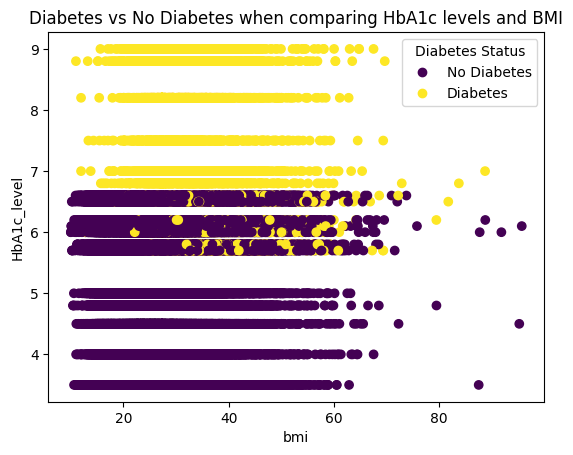

In [11]:
#To Do: Create a Scatter plot (bmi, HbA1c_level) with the class labels
#The plot should be properly annotated
plt.subplots()
scatter = plt.scatter(features.iloc[:, 3], features.iloc[:, 4], c=labels)
plt.xlabel(features.columns[3])
plt.ylabel(features.columns[4])
plt.legend(scatter.legend_elements()[0], ['No Diabetes', 'Diabetes'],
           title="Diabetes Status")
plt.title("Diabetes vs No Diabetes when comparing HbA1c levels and BMI")


### Train and evaluate using any two features (30 points)

We can first attempt to build our linear model using any two features to see how the model performs on a test set.

Text(0.5, 1.0, 'Diabetes vs No Diabetes when comparing HbA1c levels and Blood Glucose Levels')

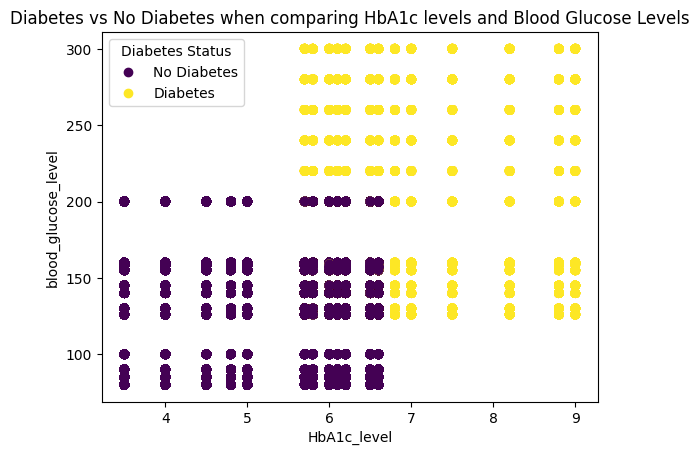

In [12]:
#To Do: Select any two features only, for model training and evaluation
plt.subplots()
scatter = plt.scatter(features.iloc[:, 4], features.iloc[:, 5], c=labels)
plt.xlabel(features.columns[4])
plt.ylabel(features.columns[5])
plt.legend(scatter.legend_elements()[0], ['No Diabetes', 'Diabetes'],
           title="Diabetes Status")
plt.title("Diabetes vs No Diabetes when comparing HbA1c levels and Blood Glucose Levels")



In [13]:
#To Do: Verify the shapes
X = features.iloc[:,0:2]
Y = labels

#Verify the shape
X.shape, Y.shape


((100000, 2), (100000,))

#### Split into Training and Testing

---

#### The general approach to evaulate any machine learning model is to split your data into train and test subsets: former subset is to train and the latter to test the trained model. In a standard split, 75% data are used in training and 25% for testing.

#### To Do:
<ul>Use the train_test_split function from scikit-learn.model_selection to split into train and test sets.</ul>

In [14]:
from sklearn.model_selection import train_test_split

#To Do: Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(features.iloc[:,4:6], labels, test_size=0.25)


#To Do: Check the shapes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
X_train, X_test, Y_train, Y_test

(       HbA1c_level  blood_glucose_level
 75128          6.1                  140
 18018          3.5                  100
 74609          4.5                   90
 73935          6.6                   85
 95127          4.8                  200
 ...            ...                  ...
 23897          4.8                  200
 43954          4.5                  145
 96480          4.0                   85
 453            4.5                  159
 69451          5.8                  159
 
 [75000 rows x 2 columns],
        HbA1c_level  blood_glucose_level
 47244          4.8                  158
 72624          3.5                  145
 92869          6.1                  140
 55593          4.8                  158
 26647          6.1                   90
 ...            ...                  ...
 62209          5.7                  155
 22188          5.7                  130
 40198          6.2                  260
 77988          5.0                   80
 80679          4.8         

In [15]:
#To Do: Check the label distribution for both train and test sets

# Link on how to access the index of the DF and Series:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html
pd.DataFrame(X_train.index).quantile([0.25, 0.5, 0.75]), pd.DataFrame(X_test.index).quantile([0.25, 0.5, 0.75]),pd.Series(Y_train.index).quantile([0.25, 0.5, 0.75]), pd.Series(Y_test.index).quantile([0.25, 0.5, 0.75])


(             0
 0.25  25014.50
 0.50  50035.50
 0.75  75013.25,
              0
 0.25  24932.75
 0.50  49881.50
 0.75  74948.75,
 0.25    25014.50
 0.50    50035.50
 0.75    75013.25
 dtype: float64,
 0.25    24932.75
 0.50    49881.50
 0.75    74948.75
 dtype: float64)

#### Linear Classification Algorithm

---

#### You can easily get this classifier from scikit-learn. For every classifier model, fit with the training data (features and targets). Then make predictions for the test data (features).

#### Obtain the predictions for the following classification algorithms:

<li>Linear model: Logistic Regression</li>

#### To Do:
<ul>Load the classifiers from sklearn</ul>
<ul>For every classifier,
  <ul>build the model</ul>
  <ul>Fit the model with the training data set</ul>
  <ul>Make prediction on the test data set</ul>
</ul>

Check the documentation at
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression for LR for example, and understand different parameters you can pass to the model. Here, we take the default setting

In [27]:
#To Do: Load the classifier from scikit-learn and then perform training and testing
from sklearn.linear_model import LogisticRegression

DiabetesRegression = LogisticRegression().fit(X_train, Y_train)
Y_prediction = DiabetesRegression.predict(X_test)
Y_prediction
DiabetesRegression.score(X_test, Y_test)

0.95652

#### Decision Boundary

Since we are dealing with a classification problem containing only 2 features, it is then possible to observe the decision function boundary. The boundary is the rule used by our predictive model to affect a class label given the two feature values of the sample.

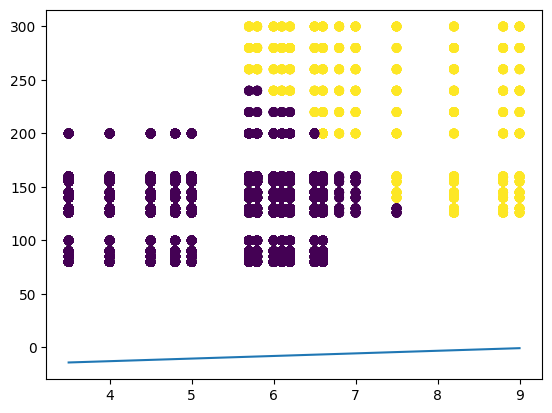

In [34]:
#To Do: Display the decision boundary and show train/test data points with class labels

Intercept = DiabetesRegression.intercept_
Coefficent = DiabetesRegression.coef_
plt.scatter(X_test.HbA1c_level, X_test.blood_glucose_level, c = Y_prediction)
predictionLineX = np.linspace(X_test.iloc[:,0].min(), X_test.iloc[:,0].max(), 10)
predictionLineY = Coefficent[0][0]*predictionLineX + Coefficent[0][1]*predictionLineX + Intercept[0]
plt.plot(predictionLineX, predictionLineY)


#### Model Evaluation

---

#### A number of evaluation metrics are available from scikit-learn.metrics that can be used for evaluating the performance of any machine learning model. We will be using the following metrics:
* Confusion matrix
* F1 Score
* ROC curve



In [18]:
#To Do: Calculate the Confusion matrix

In [19]:
#To Do: Calculate F1 score based on the Confusion matrix

In [20]:
#To Do: Plot the ROC curve with proper annotation

### Train and evaluate using all six features (30 points)

Now let's repeat the above experiment, using all six features instead of two.
Except the decision boundary and feature scatter plot, you should repeat all the steps from above in new cells below this.

#### Performance Comparison

Finally, compare their performances (2-feature model vs 6-feature model) discussing the calculated metrics.

### Use of Generative AI (5 points)

**1. Did you get any help from any Generative AI tools (e.g., ChatGPT) for completing this assignment task? Please explain.** (1 points)

Your response:

$~$


**2. What prompts did you use to get assistance from Generative AI? Please list all the prompts that you used.
If you didn't get any Generative AI assistance, simply write the following text to respond this question.** (3 points)
> **I didn't seek any Generative AI assistance to complete this assignment task.**

Your reponse:


$~$


**3. How would you distribute credit between you and the Generative AI tool? Please give the percentage of your contribution and the contribution of Generative AI.** (1 points)

Your reponse:

### Discussion with Others (5 points)

**1. Did you have (any level of discussion) with someone else in the class for completing this assignment task? Please explain.** (5 points)

Your response: